#**Project Name: SALES PREDICTION USING PYTHON**
##**Author Name:** Ganesh Arjun Patewar
##**Algorithms Used:** Linear Regression and Ridge Regressor.

##**Project description:**
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

###Importing Liabraries:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [56]:
import warnings

# Ignore a specific warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("default", category=DeprecationWarning)
warnings.filterwarnings("ignore")

###Importing dataset:

In [57]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Python All/csv/Advertising.csv')

###First look of data:

In [58]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


###Dropping the index column:

Column 'Unnamed: 0' is no more requird so I am dropping it.

In [59]:
df.drop('Unnamed: 0',axis=1,inplace=True)

###Info of data:

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


###Description of data:

In [61]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


###Checking the duplicates:

In [62]:
df.duplicated().sum()

0

There is no any duplicate value in dataframe.

###Checking the null values:

In [63]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no any null value in the dataframe

#Data Visualization:

##Violinplot, Distplot and Boxplot for dependent variable.

In [64]:
independent_var=['TV','Radio'	,'Newspaper']
dependent_var='Sales'

TV
Skewness of TV is -0.06985336213274573


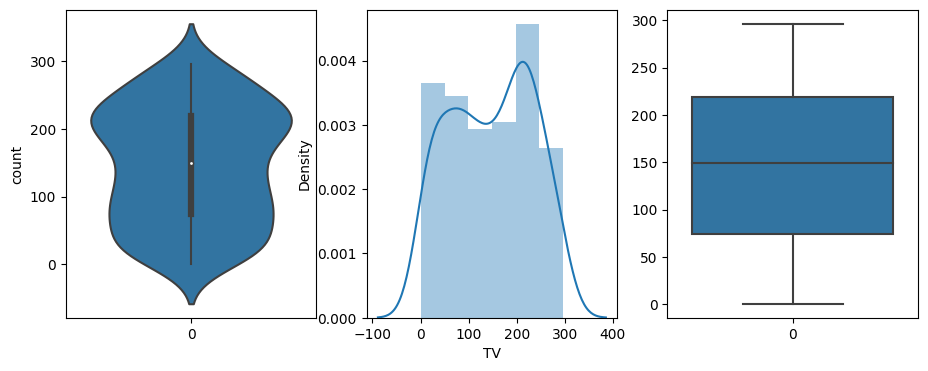

Radio
Skewness of Radio is 0.09417463149664404


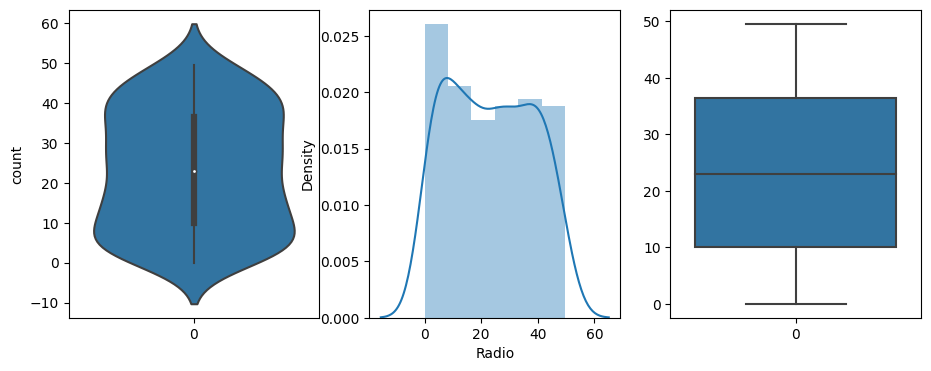

Newspaper
Skewness of Newspaper is 0.8947204074986175


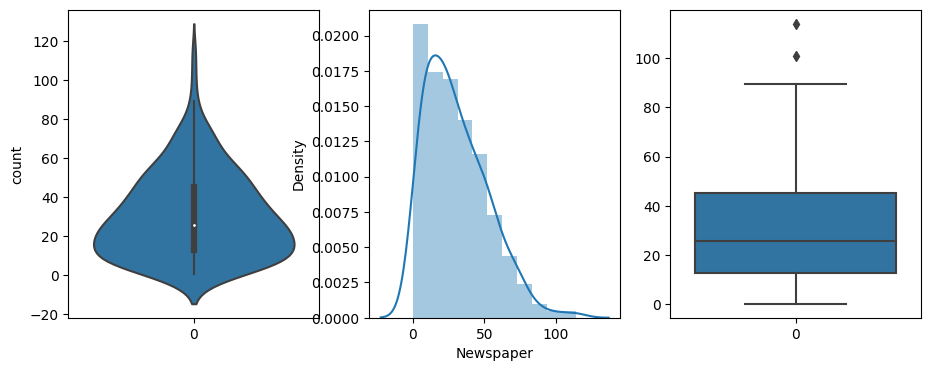

In [75]:
for col in independent_var:
  print(col)
  print(f'Skewness of {col} is {df[col].skew()}')
  plt.figure(figsize=(11,4))
  plt.subplot(1,3,1)
  sns.violinplot(df[col])
  plt.ylabel('count')
  plt.subplot(1,3,2)
  sns.distplot(df[col])
  
  plt.subplot(1,3,3)
  sns.boxplot(df[col])
  plt.show()

Based on the plots presented above, it is evident that the spread of data points exhibits a near-linear pattern, indicating the suitability of linear regression for model building. Furthermore, the distplot of the Sales variable showcases a distribution that closely resembles a normal distribution. However, upon examining the graph, we observe the presence of outliers specifically in the 'Newspaper' column.

##Violinplot, Distplot and Boxplot for dependent variable.

Sales
Skewness of Sales is {0.4075714250767127}


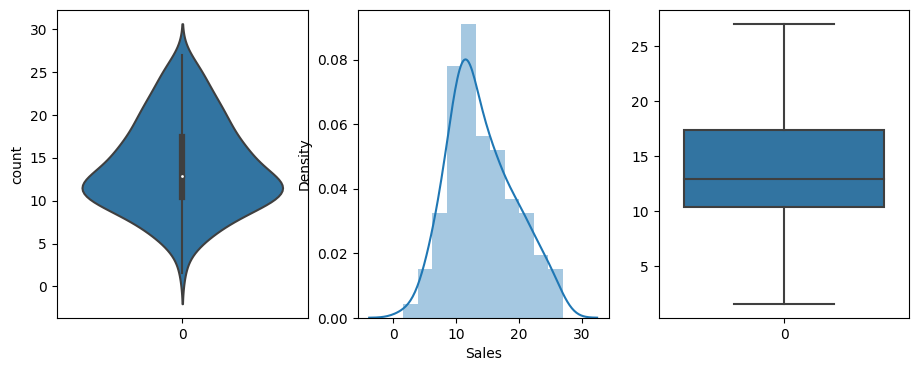

In [76]:
print('Sales')
print(f'Skewness of Sales is', {df['Sales'].skew()})
plt.figure(figsize=(11,4))
plt.subplot(1,3,1)
sns.violinplot(df['Sales'])
plt.ylabel('count')
plt.subplot(1,3,2)
sns.distplot(df['Sales'])
  
plt.subplot(1,3,3)
sns.boxplot(df['Sales'])
plt.show()

###Analysing the outliers using Kurtosis:

In [66]:
def find_kurtosis(df,columns):
  for col in columns:
    print('Kurtosis of',col,':',df[col].kurtosis())

In [67]:
find_kurtosis(df,independent_var)

Kurtosis of TV : -1.2264948242299691
Kurtosis of Radio : -1.2604014033120108
Kurtosis of Newspaper : 0.6495019091381007


Kurtosis score of all cloumns is below 3 means the distribution of datapoints in all 3 columns are almost in normal distribution.

###Checking the outlier values:

In [68]:
data=df['Newspaper']

In [69]:
Q1=data.quantile(0.25)      # Q1 is Lower quartile. 
Q3=data.quantile(0.75)      # Q3 is Upper quartile
IQR= Q3-Q1                  # IQR means Inter Quartile Range which is numerical difference between Q1 and Q3.
print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)

Q1: 12.75
Q3: 45.1
IQR: 32.35


In [70]:
Lower_bound= Q1-1.5*IQR   # Lower whisker 
Upper_bound=Q3+1.5*IQR    # Upper whisker

print('Lower_bound:',Lower_bound)
print('Upper_bound:',Upper_bound)

Lower_bound: -35.775000000000006
Upper_bound: 93.625


In [71]:
outliers=data[(data<Lower_bound) | (data>Upper_bound)]
outliers

16     114.0
101    100.9
Name: Newspaper, dtype: float64

The outliers in 'Newspaper' column are entry number 16 and 101.

###Plotting Correaltion matrix and Heatmap:

In [77]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

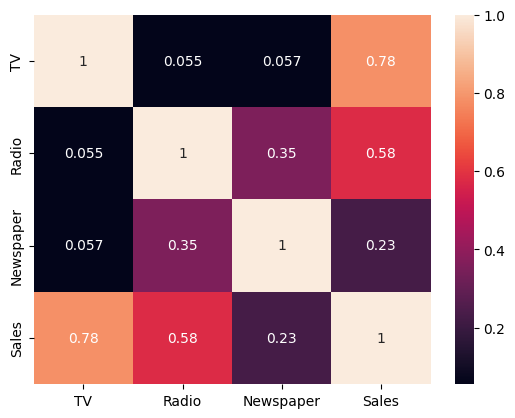

In [78]:
sns.heatmap(df.corr(),annot=True)

This heatmap indicates a strong correlation between the TV and Radio columns with the Sales column. Additionally, there appears to be a correlation between the Radio and Newspaper columns as well.

#Model Building:

###Creating dataset X of independent vaiables:

In [79]:
x=df.iloc[:,1:4]
x.head()

,Radio,Newspaper,Sales
0,37.8,69.2,22.1
1,39.3,45.1,10.4
2,45.9,69.3,9.3
3,41.3,58.5,18.5
4,10.8,58.4,12.9


###Creating dataset Y of dependent vaiable:

In [80]:
y=df.iloc[:,-1]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

###Splitting the data into train and test data:

In [81]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1234)

In [82]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (160, 3)
x_test (40, 3)
y_train (160,)
y_test (40,)


In [83]:
y_train

146    13.2
32      9.6
43     12.9
99     17.2
88     12.9
       ... 
152    16.6
116    12.2
53     21.2
38     10.1
47     23.2
Name: Sales, Length: 160, dtype: float64

###Scaling the data:

In [84]:
#Using normalization for scaling
scaler=MinMaxScaler()

###Fitting the data in model:

In [85]:
x_train=scaler.fit_transform(x_train)

In [86]:
x_test=scaler.transform(x_test)

##Using the linear regression:

In [87]:
regressor=LinearRegression()

In [88]:
#Fitting the data in regressor
regressor.fit(x_train,y_train)

LinearRegression()

####Intercept of model:

In [89]:
print(f'The intercept of this moddel is {regressor.intercept_}')

The intercept of this moddel is 1.6000000000000032


####Other coefficients of model:

In [90]:
regressor.coef_

array([ 3.60281380e-15, -1.77635684e-14,  2.54000000e+01])

In [91]:
for i, j in zip(independent_var,regressor.coef_):
  print(f'The value of {i} is {j}.')

The value of TV is 3.602813802530176e-15.
The value of Radio is -1.7763568394002505e-14.
The value of Newspaper is 25.400000000000006.


####Score of train data:

In [92]:
regressor.score(x_train,y_train)                 #Finding the score of train data using linear regression

1.0

####Score of test data:

In [93]:
regressor.score(x_test,y_test)                  #Finding the score of train data using linear regression

1.0

The linear regression model giving us the excellent result for Train as well as Test data.

###Despite achieving excellent train and test scores with the linear regression model, I am currently assessing its performance using Ridge Regression and Lasso Regression.


##Using Ridge regression:

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV        # Using GridSearch cross validation technique

In [95]:
ridge_regressor=Ridge()

In [96]:
parameters={'alpha':[1,2,3,4,5,10,15,20,30,50,100]}     #here alpha is hyper-parameter which is used in ridge regression
ridgecv= GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 15, 20, 30, 50, 100]},
             scoring='neg_mean_squared_error')

In [97]:
# Finding the best value of alpha for better performance
ridgecv.best_params_

{'alpha': 1}

Here the value of alpha as best parameter is coming as  which means this ridge regression is working like Linear regression only.

###Calculating the score of model:

In [98]:
# Prediciting the y_train based on ridge regression and GridSearchCV
y_train_ridge_pred=ridgecv.predict(x_train)

In [99]:
# Prediciting the y_test based on ridge regression and GridSearchCV
y_test_Ridge_pred=ridgecv.predict(x_test)

In [100]:
from sklearn.metrics import r2_score

In [101]:
# Using r2_score calculating the accuracy of model on train data
r2_score(y_train_ridge_pred,y_train)

0.970641672372931

In [102]:
# Using r2_score calculating the accuracy of model on train data
r2_score(y_test_Ridge_pred,y_test)

0.9689213594948768

The score of model on Train and Test data is excellent. So we can either use linear regression or ridge regression for predicting the value of Sales. 

##Predicting the Sales:

In [103]:
input=[[0.14777328, 0.07387863, 0.45669291]]

In [104]:
regressor.predict(input)

array([13.19999991])

In [105]:
ridgecv.predict(input)

array([12.81419552])

From above example we can see there is very  small difference between predicted value of sale using linear regression and ridge regression.